In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [24]:
proj_path = os.path.join((os.getcwd()),os.path.pardir)
raw_path = os.path.join(proj_path, "data","raw")
train_file_path=os.path.join(raw_path, "train.csv")
test_file_path=os.path.join(raw_path, "test.csv")
train_df = pd.read_csv(train_file_path, index_col="PassengerId")
test_df = pd.read_csv(test_file_path, index_col="PassengerId")
titanic_df = pd.concat((train_df,test_df))

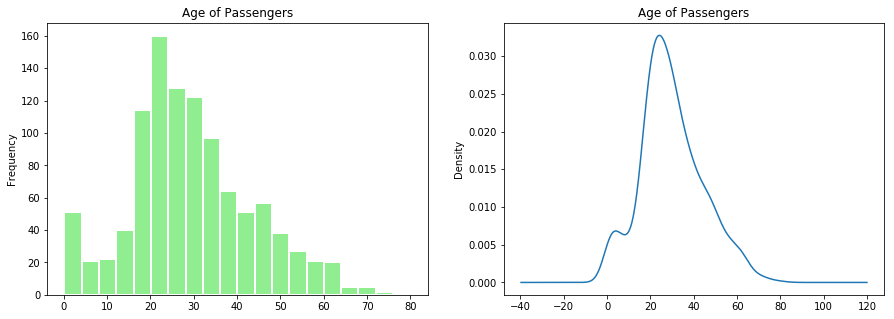

In [30]:
%matplotlib inline
fig, axs = plt.subplots(1,2)
titanic_df.Age.plot(figsize=(15,5),kind="hist",title="Age of Passengers",bins=20, 
                    color="lightgreen", edgecolor='white', linewidth=2, ax = axs[0]);
titanic_df.Age.plot(figsize=(15,5),kind="kde",title="Age of Passengers",ax=axs[1]);

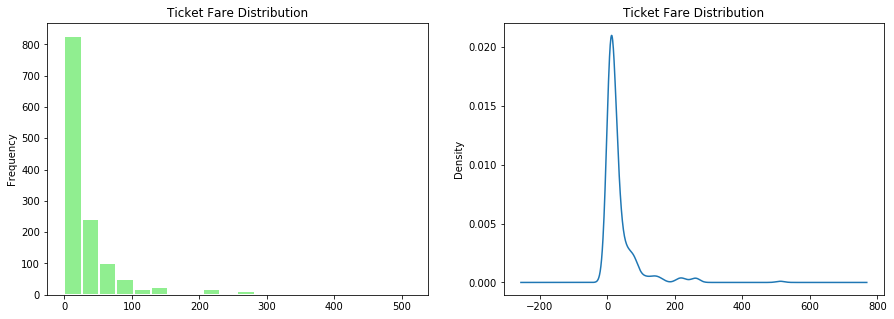

In [31]:
fig, axs = plt.subplots(1,2)
titanic_df.Fare.plot(figsize=(15,5),kind="hist",title="Ticket Fare Distribution",bins=20, 
                    color="lightgreen", edgecolor='white', linewidth=2, ax = axs[0]);
titanic_df.Fare.plot(figsize=(15,5),kind="kde",title="Ticket Fare Distribution",ax=axs[1]);

In [32]:
print('skewness for age: {0:0.2f}'.format(titanic_df.Age.skew()))
print('skewness for age: {0:0.2f}'.format(titanic_df.Fare.skew()))

skewness for age: 0.41
skewness for age: 4.37


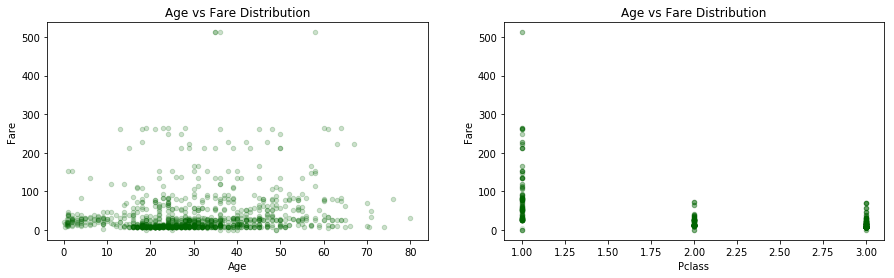

In [44]:
fig, axs = plt.subplots(1,2)
titanic_df.plot.scatter(figsize=(15,4),x="Age", y="Fare", title="Age vs Fare Distribution",
                        color="darkgreen", alpha=0.2, ax=axs[0]);
titanic_df.plot.scatter(figsize=(15,4),x="Pclass", y="Fare", title="Age vs Fare Distribution",
                        color="darkgreen", alpha=0.1, ax=axs[1]);

### GROUPING AND AGGREGATION

In [52]:
from pprint import pprint as pp
titanic_df.groupby("Age").mean()


,Fare,Parch,Pclass,SibSp,Survived
Age,,,,,
0.17,20.575000,2.000000,3.000000,1.000000,NaN
0.33,14.400000,2.000000,3.000000,0.000000,NaN
0.42,8.516700,1.000000,3.000000,0.000000,1.000000
0.67,14.500000,1.000000,2.000000,1.000000,1.000000
0.75,17.430533,1.000000,3.000000,1.666667,1.000000
0.83,19.033333,1.333333,2.333333,0.333333,1.000000
0.92,89.650000,2.000000,1.500000,1.000000,1.000000
1.00,28.050420,1.500000,2.700000,1.600000,0.714286
2.00,34.881250,1.250000,2.583333,1.916667,0.300000


In [53]:
titanic_df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [54]:
titanic_df.groupby(["Pclass"]).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [56]:
titanic_df.groupby(["Pclass"])["Fare","Age"].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [57]:
titanic_df.groupby(["Pclass"]).agg({"Fare":"mean","Age":"median"})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [70]:
aggregations = {
    "Fare":{
        "mean_fare":"mean",
        "median_fare":"median",
        "max_fare":"max",
        "min_fare":np.min
    },
    "Age":{
        "median_age":"median",
        "max_age":"max",
        "min_age":"min",
        "range_age": lambda x: max(x)-min(x)
    }
}

In [71]:
titanic_df.groupby(["Pclass"]).agg(aggregations)

C:\Users\debab\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare  max_fare min_fare median_age max_age min_age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    80.0    0.92   
2       21.179196     15.0458   73.5000      0.0       29.0    70.0    0.67   
3       13.302889      8.0500   69.5500      0.0       24.0    74.0    0.17   

                  
       range_age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [67]:
titanic_df.groupby(["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [74]:
titanic_df.groupby(["Pclass"]).agg(aggregations)

C:\Users\debab\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare  max_fare min_fare median_age max_age min_age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    80.0    0.92   
2       21.179196     15.0458   73.5000      0.0       29.0    70.0    0.67   
3       13.302889      8.0500   69.5500      0.0       24.0    74.0    0.17   

                  
       range_age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [76]:
pd.crosstab(titanic_df.Sex,titanic_df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [118]:
titanic_df.groupby(["Sex","Pclass"])["Sex"].agg("count").to_frame().iloc[0:6
                                                                         ,0:3].unstack()

Sex          
Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493

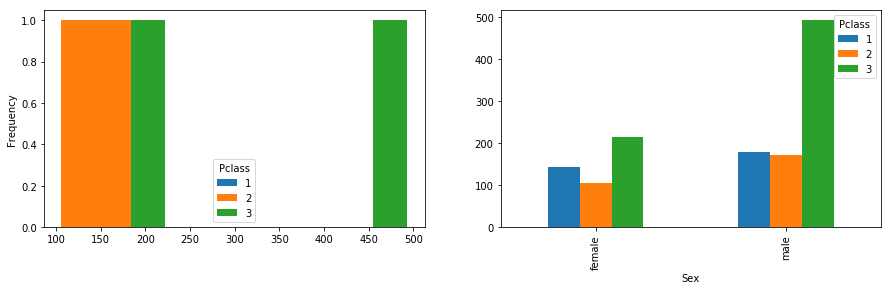

In [111]:
fig, axs = plt.subplots(1,2)
pd.crosstab(titanic_df.Sex,titanic_df.Pclass).plot(kind="hist", ax=axs[0], figsize=(15,4));
pd.crosstab(titanic_df.Sex,titanic_df.Pclass).plot(kind="bar", ax=axs[1], figsize=(15,4))

In [112]:
titanic_df.pivot_table(index="Sex", columns = "Pclass", values="Age", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [116]:
titanic_df.groupby(["Pclass","Sex"])["Age"].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [117]:
titanic_df.groupby(["Pclass","Sex"])["Age"].mean().unstack()

Sex,female,male
Pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264
